https://drive.google.com/file/d/1PrSPTAVz6lXKAqNcTlUvWc_de8TRILOx/view?usp=sharing

https://www.kaggle.com/datasets/mirichoi0218/insurance

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import statsmodels.api as sm

In [6]:
sns.set_style("whitegrid")

In [7]:
df = pd.read_csv('insurance.csv')
print(df.shape)
df.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Distribution of variable to predict

<Axes: >

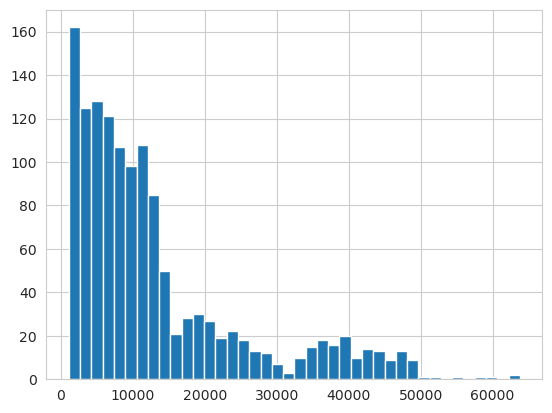

In [8]:
df.charges.hist(bins = 40)

Deletion of outliers. Not recommended for real cases

In [9]:
df[df.charges>50000]
df = df[df.charges<50000]

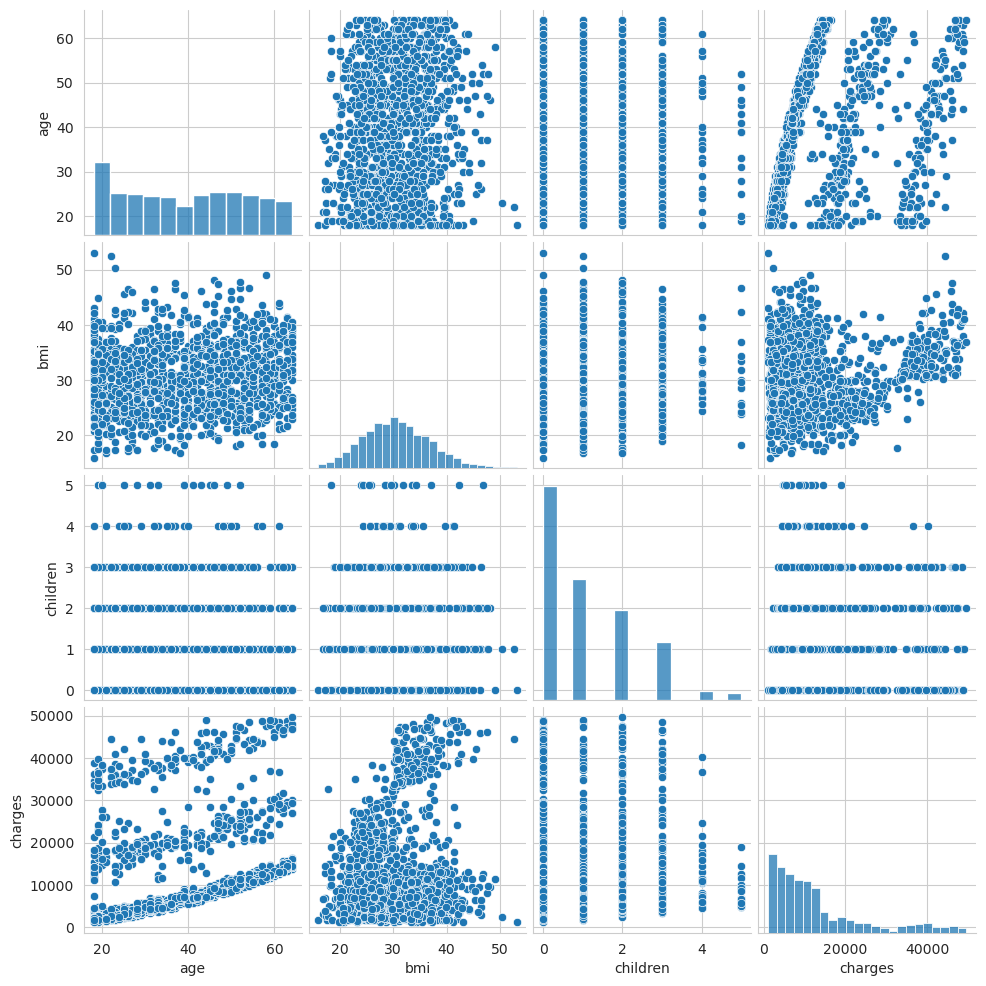

In [10]:
sns.pairplot(df, height=2.5)
plt.show()

First insights:

- Hay 3 grupos de personas diferentes que se clasifican en edad / cargos, esto puede ser un punto a analizar después.

En general los valores se distribuyen de manera esperada. Con valores extremos en el caso de los cargos, sin embargo esto es de esperarse pues los cargos en los hospitales pueden variar mucho por quedarse un día más en el hospital o incluso por procedimientos extras.

- Parece que los datos están limpios, la variable de índice de masa corporal se distribuye de manera normal o gausiana, lo cual sería esperado en un índice de este tipo.

<Axes: >

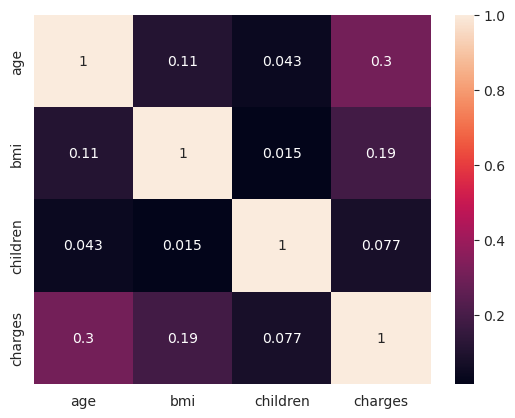

In [11]:
numeric_cols = ['age', 'bmi', 'children', 'charges']
sns.heatmap(df[numeric_cols].corr(),annot=True, yticklabels=numeric_cols,xticklabels=numeric_cols)

Using the other variables

In [12]:
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True) #Drop_first is used for deleting one column for each cathegorical, using the value (0,0) for representing it
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


Creting the model

In [34]:
X_cols = list(set(df.columns)-set(['charges']))
y_col = ['charges']

X = df[X_cols].values
y = df[y_col].values

X_train, X_test, y_train, y_test = train_test_split(X,y)
sc_x = StandardScaler().fit(X)
sc_y = StandardScaler().fit(y)

X_train =  sc_x.transform(X_train)
X_test =  sc_x.transform(X_test)
y_train =  sc_y.transform(y_train)
y_test =  sc_y.transform(y_test)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [14]:
y_pred.shape

(333, 1)

Metrics functions

In [35]:
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print('r2', round(r2,4)) #Up to 0.75 is a good value
print('mse', round(mse,4))

r2 0.7955
mse 0.2361


In [36]:
model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

In [17]:
y_test = y_test.reshape(-1)

print("====Summary====")
# Agregamos constante para el intercepto (muy importante para statsmodels)
X_test_sm = sm.add_constant(X_test)
# Creamos el modelo de regresión OLS (Ordinary Least Squares)
model_sm = sm.OLS(y_test, X_test_sm).fit()
# Mostramos el summary completo
print(model_sm.summary())

====Summary====
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     126.0
Date:                Tue, 06 May 2025   Prob (F-statistic):           1.13e-94
Time:                        19:52:09   Log-Likelihood:                -247.14
No. Observations:                 333   AIC:                             512.3
Df Residuals:                     324   BIC:                             546.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.029    

Summary interpretation:
- Estimate column contain the values of the intercept with y axis and the values of w0, w1, ..., wn
- p value column is important and it will be explained in the next classes
- R-squared: it should be greater than 0.75 for being a good model
- Adjusted R-squared: it's always smaller than R-squared. It musn't be much smaller than R-squared

Plot residuals

If the points are close to y = 0, the predictions are accurate

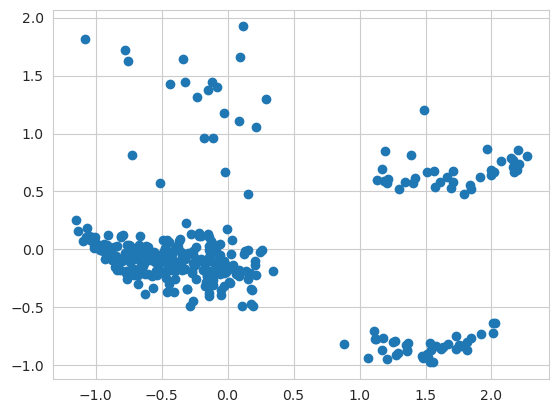

In [18]:
residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuals)
plt.show()

#### Second model

In [21]:
df_second = df.copy()

In [22]:
df_second['age-squared'] = df_second['age']**2
df_second['overweight'] = (df_second['bmi'] >= 30).astype(int)
df_second['overweight-smoker'] = df_second['overweight'] * df_second['smoker_yes']

In [41]:
X_cols = list(set(df_second.columns)-set(['charges']))
y_col = ['charges']

X = df_second[X_cols].values
y = df_second[y_col].values

X_train, X_test, y_train, y_test = train_test_split(X,y)
sc_x = StandardScaler().fit(X)
sc_y = StandardScaler().fit(y)

X_train =  sc_x.transform(X_train)
X_test =  sc_x.transform(X_test)
y_train =  sc_y.transform(y_train)
y_test =  sc_y.transform(y_test)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [42]:
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print('r2', round(r2,4)) #Up to 0.75 is a good value
print('mse', round(mse,4))

r2 0.8878
mse 0.1265


In [43]:
model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

In [44]:
y_test = y_test.reshape(-1)

print("====Summary====")
# Agregamos constante para el intercepto (muy importante para statsmodels)
X_test_sm = sm.add_constant(X_test)
# Creamos el modelo de regresión OLS (Ordinary Least Squares)
model_sm = sm.OLS(y_test, X_test_sm).fit()
# Mostramos el summary completo
print(model_sm.summary())

====Summary====
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     240.2
Date:                Tue, 06 May 2025   Prob (F-statistic):          1.26e-147
Time:                        20:06:39   Log-Likelihood:                -122.38
No. Observations:                 333   AIC:                             268.8
Df Residuals:                     321   BIC:                             314.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0006      0.020    

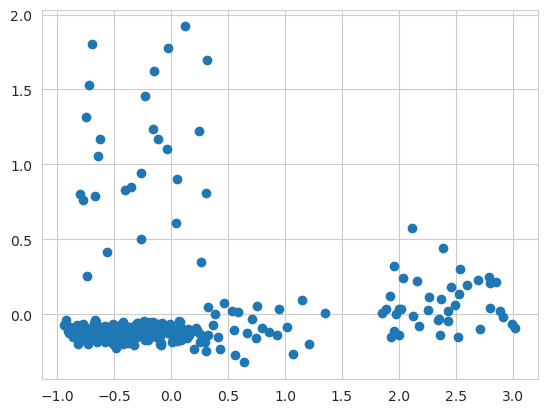

(333, 1)
(333,)


In [ ]:
residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuals)
plt.show()

#### Third model

Taking only variables with values close to 0. This process is iterative until you have no variables far from 0.

In [47]:
X_cols = ['region_southwest', 'overweight-smoker', 'smoker_yes', 'age-squared', 'children']
y_col = ['charges']

X = df_second[X_cols].values
y = df_second[y_col].values

X_train, X_test, y_train, y_test = train_test_split(X,y)
sc_x = StandardScaler().fit(X)
sc_y = StandardScaler().fit(y)

X_train =  sc_x.transform(X_train)
X_test =  sc_x.transform(X_test)
y_train =  sc_y.transform(y_train)
y_test =  sc_y.transform(y_test)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [48]:
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print('r2', round(r2,4)) #Up to 0.75 is a good value
print('mse', round(mse,4))

r2 0.8344
mse 0.1628


In [49]:
model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

In [50]:
y_test = y_test.reshape(-1)

print("====Summary====")
# Agregamos constante para el intercepto (muy importante para statsmodels)
X_test_sm = sm.add_constant(X_test)
# Creamos el modelo de regresión OLS (Ordinary Least Squares)
model_sm = sm.OLS(y_test, X_test_sm).fit()
# Mostramos el summary completo
print(model_sm.summary())

====Summary====
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     334.1
Date:                Tue, 06 May 2025   Prob (F-statistic):          3.91e-126
Time:                        20:13:57   Log-Likelihood:                -168.34
No. Observations:                 333   AIC:                             348.7
Df Residuals:                     327   BIC:                             371.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0277      0.022    

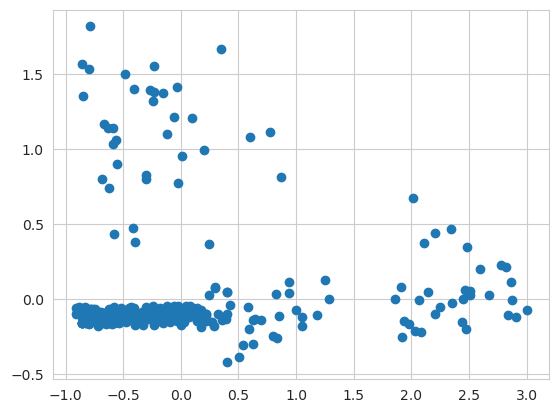

In [51]:
residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuals)
plt.show()

- A model has high variance when its are too different for different samples
- Regularization of models: applying a penalty in the cost function
- You can add regression support vectors